<a href="https://colab.research.google.com/github/netmatze/mlmatze/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_temp_monthly = pd.read_csv('jena_climate_complete_hourly.csv')
df_temp_monthly.set_index('Date Time')
df_temp_monthly.columns
df_temp_hourly = df_temp_monthly[['Date Time', 'p (mbar)', 'T (degC)']]
df_temp_hourly['Date'] = pd.to_datetime(df_temp_hourly['Date Time'])
df_temp_hourly['Month'] = df_temp_hourly['Date'].dt.month
df_temp_hourly['Year'] = df_temp_hourly['Date'].dt.year
df_temp_hourly.set_index('Date Time')
df_temp_hourly.sort_values(by='Date', inplace=True, ascending=False)
df_temp_hourly['Lag_1'] = df_temp_hourly['T (degC)'].shift(periods=1)
df_temp_hourly['Lag_2'] = df_temp_hourly['T (degC)'].shift(periods=2)
df_temp_hourly['diff1'] = df_temp_hourly['T (degC)'] - df_temp_hourly['T (degC)'].shift(periods=1)
df_temp_hourly['diff2'] = df_temp_hourly['diff1'].shift(periods=1)
df_temp_hourly.head()

In [ ]:
import pandas as pd
df_temp_monthly = pd.read_csv('jena_climate_complete_hourly.csv')
df_temp_monthly.set_index('Date Time')
df_temp_monthly.columns
df_temp_hourly = df_temp_monthly[['Date Time', 'p (mbar)', 'T (degC)']]
df_temp_hourly['Date'] = pd.to_datetime(df_temp_hourly['Date Time'])
df_temp_hourly['Month'] = df_temp_hourly['Date'].dt.month
df_temp_hourly['Lag_1'] = df_temp_hourly['T (degC)'].shift(periods=1)
df_temp_hourly['Lag_2'] = df_temp_hourly['T (degC)'].shift(periods=2)
df_temp_hourly['diff1'] = df_temp_hourly['T (degC)'] - df_temp_hourly['T (degC)'].shift(periods=1)
df_temp_hourly['diff2'] = df_temp_hourly['diff1'].shift(periods=1)
df_temp_monthly.set_index('Date Time')
df_temp_hourly.head()

In [ ]:
import matplotlib.pyplot as plt
df_temp_hourly_10 = df_temp_hourly#.iloc[:-1]
df_temp_hourly_10 = df_temp_hourly[df_temp_hourly['Year'] >= 2014]
plt.figure(figsize=(18,12))
plt.plot(df_temp_hourly_10['Date'], df_temp_hourly_10['T (degC)'], label = "timeseries")
#plt.plot(df_temp_hourly_10['Date'], df_temp_hourly_10['Lag_1'], label = "lag 1")
#plt.plot(df_temp_hourly_10['Date'], df_temp_hourly_10['Lag_2'], label = "lag 2")
# plt.plot(df_temp_hourly_10['Date'], df_temp_hourly_10['diff1'], label = "diff1")
# plt.plot(df_temp_hourly_10['Date'], df_temp_hourly_10['diff2'], label = "diff2")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df_temp_hourly_10 = df_temp_hourly.iloc[5:15]
plt.figure(figsize=(10,6))
plt.plot(df_temp_hourly_10['Date'], df_temp_hourly_10['diff1'], label = "diff1")
plt.plot(df_temp_hourly_10['Date'], df_temp_hourly_10['diff2'], label = "diff2")
plt.legend()
plt.show()

In [ ]:
import numpy as np
X = np.random.randn(500)
for t in range(1, len(X)):
    X[t] = 0.5*X[t-1] + X[t]
print(X)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_temp_hourly_10['T (degC)'], lags=4)
plot_pacf(df_temp_hourly_10['T (degC)'], lags=4)
plt.show()

In [ ]:
import pandas as pd
df_ice_cream = pd.read_csv('ice_cream.csv')
#df_ice_cream.set_index('Date Time')
df_ice_cream['IPN31152N'].rename
df_ice_cream.rename(columns = {'IPN31152N':'production'}, inplace = True)
df_ice_cream = df_ice_cream.set_index('DATE')
print(df_ice_cream.columns)
# df_ice_cream['Date'] = pd.to_datetime(df_ice_cream['DATE'])
# df_ice_cream['Month'] = df_ice_cream['Date'].dt.month
# df_ice_cream['Year'] = df_ice_cream['Date'].dt.year
# df_ice_cream.set_index('Date')
# #df_ice_cream.sort_values(by='Date', inplace=True, ascending=False)
# df_ice_cream['Lag_1'] = df_ice_cream['production'].shift(periods=1)
# df_ice_cream['Lag_2'] = df_ice_cream['production'].shift(periods=2)
# df_ice_cream['diff1'] = df_ice_cream['production'] - df_ice_cream['production'].shift(periods=1)
# df_ice_cream['diff2'] = df_ice_cream['diff1'].shift(periods=1)
df_ice_cream.tail(10)

Index(['production'], dtype='object')


,production
DATE,
2019-04-01,114.9703
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094


In [ ]:
import matplotlib.pyplot as plt
df_ice_cream = df_ice_cream#.iloc[:-1]
#df_ice_cream = df_ice_cream[df_ice_cream['Year'] >= 2014]
plt.figure(figsize=(12,8))
plt.plot( df_ice_cream['production'], label = "ice cream production")
#plt.plot(df_ice_cream['Date'], df_ice_cream['Lag_1'], label = "lag 1")
#plt.plot(df_ice_cream['Date'], df_ice_cream['Lag_2'], label = "lag 2")
# plt.plot(df_ice_cream['Date'], df_ice_cream['diff1'], label = "diff1")
# plt.plot(df_ice_cream['Date'], df_ice_cream['diff2'], label = "diff2")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df_ice_cream['Date'], df_ice_cream['diff1'], label = "diff1")
plt.plot(df_ice_cream['Date'], df_ice_cream['diff2'], label = "diff2")
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df_ice_cream['production'], lags=8)

In [ ]:
pacf_plot = plot_pacf(df_ice_cream['production'], lags=14)

In [ ]:
from datetime import datetime
df_ice_cream.head(50)
#df = pd.Series(df_ice_cream['production'], index=df_ice_cream['DATE'])
#df.head(50)
# first_diff = df_ice_cream['production'].diff()[1:]

train_end = datetime(2019,1,1)
test_end = datetime(2020,1,1)

# train_data = df_ice_cream[df_ice_cream <= train_end]
#train_data = df_ice_cream.filter(items = ['Item_C'], axis=0)
train_data = df_ice_cream.loc[:str(train_end)]
test_data = df_ice_cream.loc[str(train_end):str(test_end)]
# test_data = df_ice_cream[df_ice_cream['Date'] >= train_end]# & df_ice_cream['Date'] <= test_end]
# #print(len(test_data))
# #print(len(train_data))
#train_data.head(30)
#test_data.head(30)

In [ ]:
#from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm
import time

model = sm.tsa.arima.ARIMA(train_data, order=(4,0,4))
start = time.time()
model_fit = model.fit()
end = time.time()
print(f'model fit time: {start - end}')
model_fit.summary()

### yhead = 0.0418 *y-1 - 0.9394 *y-2 - 0.0005 * y-3 + 0.9570 * y-4 +0.1463 * epsilon-1 + 1.0031 * epsilon-2 + 0.1533 * epsilon-3 - 0.9514 * epsilon-4



In [ ]:
# pred_start_date = test_data[0]
# pred_end_date = test_data[-1]
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date, pred_end_date)
print(len(test_data))
preds = model_fit.predict(start_date='2019-08-01', end_date='2020-01-01')
print(preds)
print(len(preds))
#df_preds = pd.DataFrame(preds)
# print(len(df_preds))
#print(len(test_data))
# df_preds.head(100)
#print(test_data['production'])
#test_data.head(20)

residuals = test_data - preds
print(residuals)

# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# #plt.plot(test_data['Date'], test_data['production'], label = "production")
# plt.plot(preds, label = "residuals")
# #plt.plot(df_ice_cream['Date'], df_ice_cream['diff2'], label = "diff2")
# plt.legend()
# plt.show()

In [ ]:
plt.figure(figsize=(10,4))
#plt.plot(test_data['production'])
plt.plot(preds)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('First Difference of Icream Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(residuals, label = "residuals")
#plt.plot(df_ice_cream['Date'], df_ice_cream['diff2'], label = "diff2")
plt.legend()
plt.show()

<ipython-input-3-38a78d9b6db5>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-3-38a78d9b6db5>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


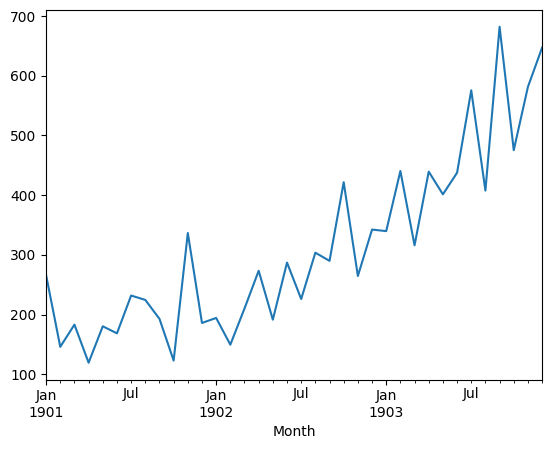

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

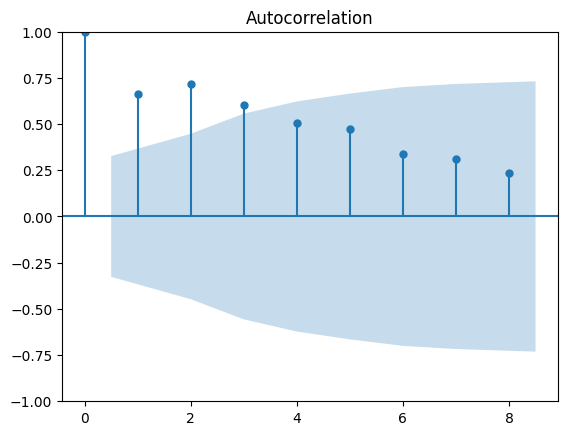

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(series, lags=8)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


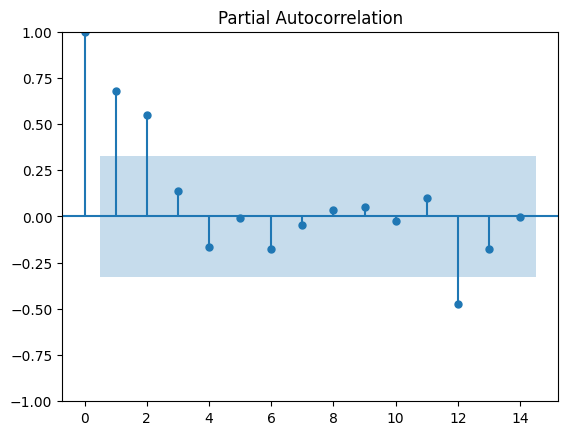

In [ ]:
pacf_plot = plot_pacf(series, lags=14)

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

model = ARIMA(series, order=(1,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
#residuals.plot(kind='kde')
#pyplot.show()
# summary stats of residuals
#print(residuals.describe())
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

pred_start_date = test[0]
pred_end_date = test[-1]
print(pred_start_date, pred_end_date)
print(len(test))
preds = model_fit.predict(start_date=pred_start_date, end_date=pred_end_date)
print(preds)
len_test = len(test)
print(len_test)
preds_test = preds[-13]#-]
print(preds_test)
df_preds = DataFrame(preds_test)
df_preds.plot()
pyplot.show()
print(test.shape, preds_test.shape)
residuals = test - preds_test
print(residuals)
# df_test = DataFrame(test)
# df_test.plot()
# pyplot.show()
df_residuals = DataFrame(residuals)
df_residuals.plot()
pyplot.show()

# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(df_test, label = "test")
# plt.plot(df_preds, label = "preds")
# #plt.plot(df_residuals, label = "residuals")
# plt.legend()
# plt.show()

### Bitcoin price

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0018f39f-7e24-83a3-b03c-8210cb66d72e)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-26 07:52:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-04-26 07:52:08 (7.58 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices.info(), len(bitcoin_prices)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


(None, 2787)

Text(0.5, 1.0, 'Bitcoin price from 2013-10-01 to 2021-05-18')

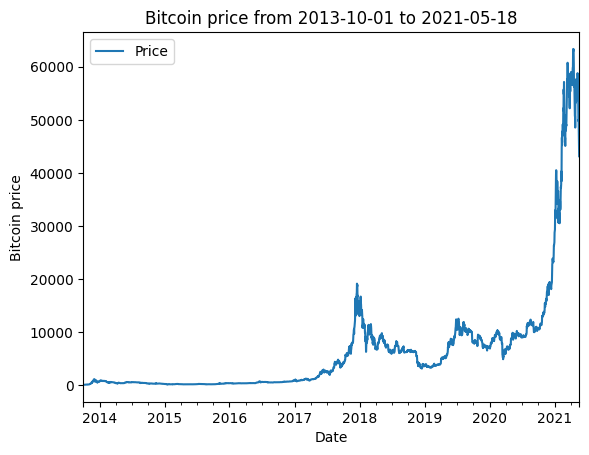

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("Bitcoin price")
plt.title("Bitcoin price from 2013-10-01 to 2021-05-18")

In [ ]:
bitcoin_prices_extended = bitcoin_prices.copy()
bitcoin_prices_extended['Month'] = bitcoin_prices.index.month
bitcoin_prices_extended['Year'] = bitcoin_prices.index.year
bitcoin_prices_extended['Lag_1'] = bitcoin_prices_extended['Price'].shift(periods=1)
bitcoin_prices_extended['Lag_2'] = bitcoin_prices_extended['Price'].shift(periods=2)
bitcoin_prices_extended['diff1'] = bitcoin_prices_extended['Price'] - bitcoin_prices_extended['Price'].shift(periods=1)
bitcoin_prices_extended['diff2'] = bitcoin_prices_extended['diff1'].shift(periods=1)
bitcoin_prices_extended.head()

,Price,Month,Year,Lag_1,Lag_2,diff1,diff2
Date,,,,,,,
2013-10-01,123.65499,10,2013,NaN,NaN,NaN,NaN
2013-10-02,125.45500,10,2013,123.65499,NaN,1.80001,NaN
2013-10-03,108.58483,10,2013,125.45500,123.65499,-16.87017,1.80001
2013-10-04,118.67466,10,2013,108.58483,125.45500,10.08983,-16.87017
2013-10-05,121.33866,10,2013,118.67466,108.58483,2.66400,10.08983


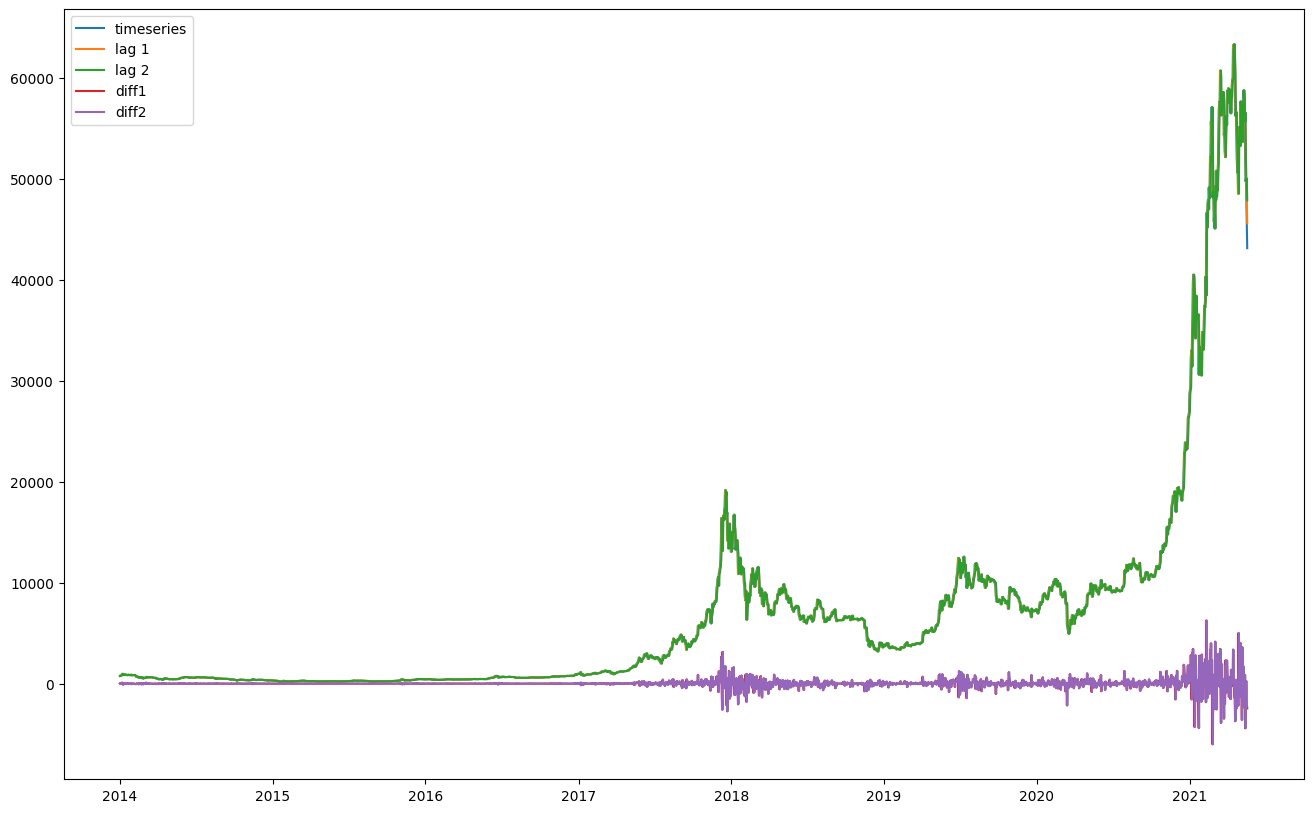

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
bitcoin_prices_extended = bitcoin_prices_extended[bitcoin_prices_extended['Year'] >= 2014]
plt.plot(bitcoin_prices_extended['Price'], label = "timeseries")
plt.plot(bitcoin_prices_extended['Lag_1'], label = "lag 1")
plt.plot(bitcoin_prices_extended['Lag_2'], label = "lag 2")
plt.plot(bitcoin_prices_extended['diff1'], label = "diff1")
plt.plot(bitcoin_prices_extended['diff2'], label = "diff2")
plt.legend()
plt.show()

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


### acf - Autocorrelation -> Moving Average Model (MA) -> ARMA(0,0,x)

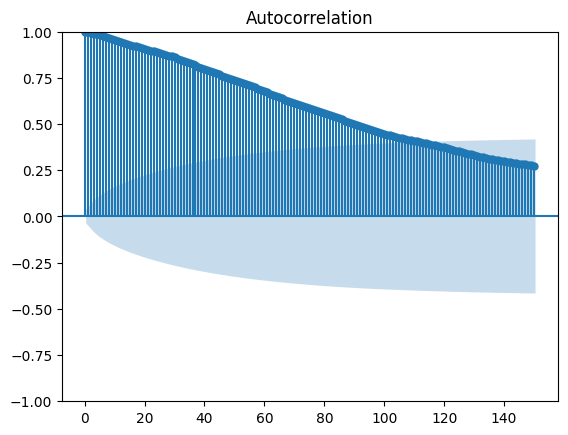

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(bitcoin_prices, lags=150)

### pacf - Partial Autocorrelation -> Auto Regressive Model (AR) -> ARMA(x,0,0)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


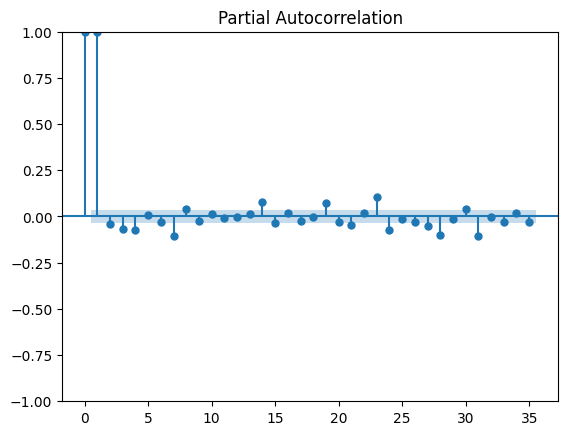

In [ ]:
pacf_plot = plot_pacf(bitcoin_prices)

In [ ]:
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(timestamps,
#                                                     prices,
#                                                     test_size=0.2,
#                                                     random_state=42)
# print(X_train[:10])
# print(y_train[:10])
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
split_size = int(0.9 * len(prices))
X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]
# print(X_train[:10])
# print(y_train[:10])
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

train = bitcoin_prices[:split_size + 1]
test = bitcoin_prices[split_size:]
print(train.shape, test.shape)

(2509, 1) (279, 1)


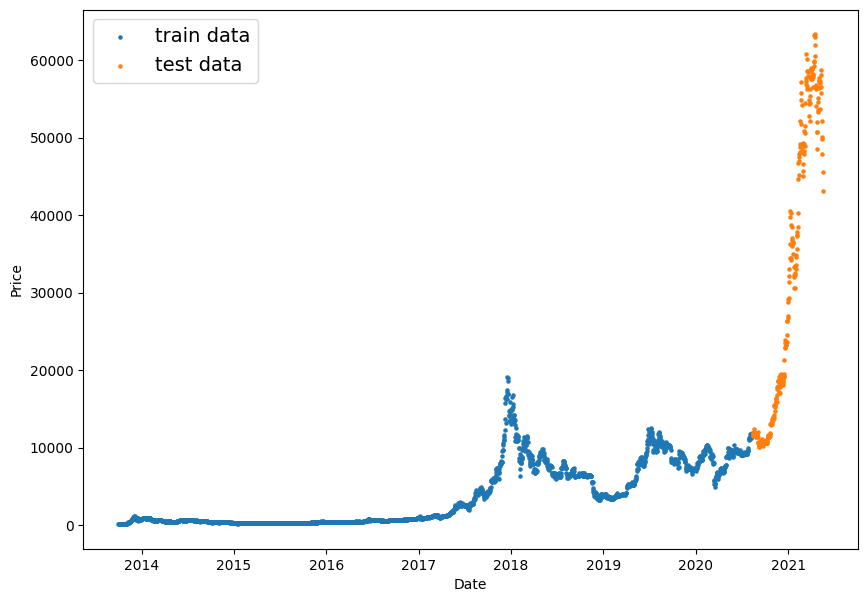

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show()

In [ ]:
horizon = 5
window = 500

In [ ]:
import statsmodels.api as sm
import time

train_window = train.tail(window)
model = sm.tsa.arima.ARIMA(train, order=(3, 1, 4))
start = time.time()
model_fit = model.fit()
end = time.time()
print(f'model fit time: {start - end}')
model_fit.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


model fit time: -8.432517290115356


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2509
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -17550.425
Date:                Wed, 26 Apr 2023   AIC                          35116.850
Time:                        07:59:32   BIC                          35163.468
Sample:                    10-01-2013   HQIC                         35133.772
                         - 08-13-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9798      0.072    -13.680      0.000      -1.120      -0.839
ar.L2          0.6139      0.132      4.665      0.000       0.356       0.872
ar.L3          0.7277      0.070     10.375      0.000       0.590       0.865
ma.L1          0.9299      0.072     12.912      0.000       0.789       1.071
ma.L2         -0.6583      0.132     -4.973      0.000      -0.918      -0.399
ma.L3         -0.6784      0.069     -9.853      0.000      -0.813      -0.543
ma.L4          0.0761      0.007     10.274      0.000       0.062       0.091
sigma2      7.078e+04    544.528    129.981      0.000    6.97e+04    7.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             88710.55
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             112.33   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2020-08-13 00:00:00 2021-05-18 00:00:00
2020-08-14    11596.919959
2020-08-15    11550.250493
2020-08-16    11575.387374
2020-08-17    11574.556116
2020-08-18    11556.839720
Freq: D, Name: predicted_mean, dtype: float64


<Axes: >

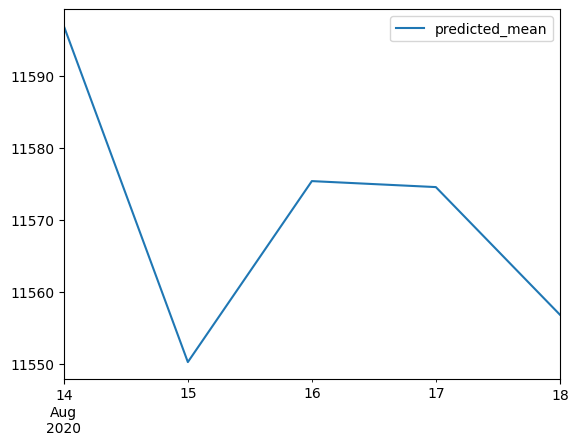

In [ ]:
pred_start_date = test.index[0]
pred_end_date = test.index[-1]
print(pred_start_date, pred_end_date)
preds = model_fit.forecast(horizon)
print(preds)
df_preds = pd.DataFrame(preds)
df_preds.plot()
#df_preds.head(20)

In [ ]:
# pred_start_date = len(y_train)
# pred_end_date = len(y_test) + len(y_train)
# print(pred_start_date, pred_end_date)
# print(len(y_test))
# preds = model_fit.predict(start_date=pred_start_date, end_date=pred_end_date)
# print(len(preds))
# y_test_len = len(y_test)
# preds_len = len(preds)
# print(y_test_len)
# preds = preds[preds_len - y_test_len:]
# print(preds.shape, y_test.shape)
# df_preds = pd.DataFrame(preds)
# df_preds.plot()

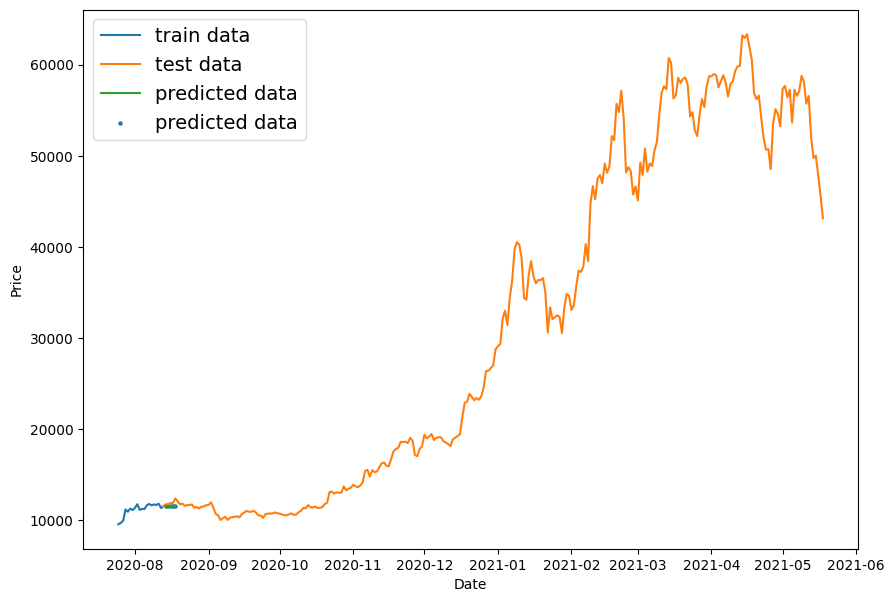

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

train_last_50 = train.tail(20)
plt.plot(train_last_50, label="train data")
plt.plot(test, label="test data")
plt.plot(preds, label="predicted data")
#plt.scatter(train_last_50.index, train_last_50['Price'], s=5, label="train data")
#plt.scatter(test.index, test['Price'][:window], s=5, label="test data")
plt.scatter(preds.index, preds, s=5, label="predicted data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show()

### Naive forecast

In [ ]:
naive_forecast = y_test[:-1]
y_test[:10], naive_forecast[:10]
naive_forecast.shape, y_test.shape

((278,), (279,))

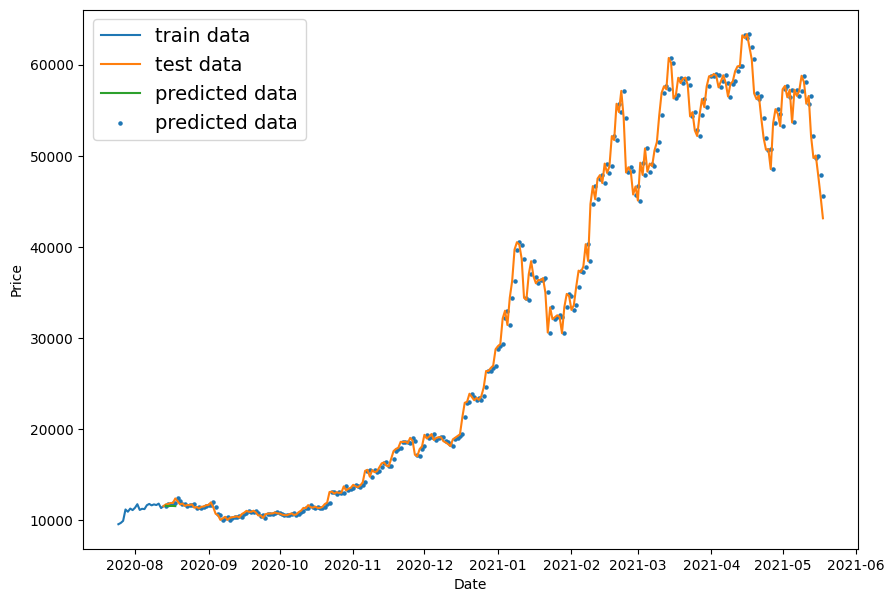

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

train_last_50 = train.tail(20)
plt.plot(train_last_50, label="train data")
plt.plot(test, label="test data")
#plt.plot(preds, label="predicted data")
#plt.scatter(train_last_50.index, train_last_50['Price'], s=5, label="train data")
#plt.scatter(test.index, test['Price'][:window], s=5, label="test data")
plt.scatter(test.index[1:], naive_forecast, s=5, label="predicted data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show()

In [ ]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  result = mae / mae_naive
  return result.numpy()

def mean_square_error(y_true, y_pred):
  msqe = tf.reduce_mean(tf.square(y_true-y_pred))
  return msqe.numpy()

def root_mean_square_error(y_true, y_pred):
  rmsqe = tf.reduce_mean(tf.square(y_true-y_pred))
  return tf.sqrt(rmsqe).numpy()

def mean_absolute_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  return mae.numpy()

# MAPE = (1/n) * Σ(|actual – forecast| / |actual|) * 100
def mean_absolute_percentage_error(y_true, y_pred):
  mape = 1 / len(y_true) * tf.reduce_sum(tf.abs(y_true-y_pred) / y_true) * 100
  return mape.numpy()

def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  masce = mean_absolute_scaled_error(y_true, y_pred)
  msqe = mean_square_error(y_true, y_pred)
  rmsqe = root_mean_square_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  return {"mean square error": msqe,
          "root mean square error": rmsqe,
          "mean absolute error": mae,
          "mean absolute scaled error": masce,
          "mean absolute percentage error" : mape}

In [ ]:
evaluate_preds(y_test[1:],naive_forecast)

{'mean square error': 2210476.0,
 'root mean square error': 1486.767,
 'mean absolute error': 944.3695,
 'mean absolute scaled error': 0.99717253,
 'mean absolute percentage error': 2.6873498}

In [ ]:
mean_absolute_scaled_error(y_test[1:],naive_forecast)

In [ ]:
mean_square_error(y_test[1:],naive_forecast)

In [ ]:
root_mean_square_error(y_test[1:],naive_forecast)

In [ ]:
HORIZON = 1
WINDOW = 500

In [ ]:
def get_labeled_window(x, horizon=HORIZON):
  return x[:,:-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labeled_window(tf.expand_dims(tf.range(8) +1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
import itertools
import statsmodels.api as sm
import time
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf

def mean_square_error(y_true, y_pred):
  sum = np.sum(np.square(y_true-y_pred))
  msqe = sum / len(y_true)
  return msqe

def mean_absolute_percentage_error(y_true, y_pred):
  mape = 1 / len(y_true) * np.sum(np.abs(y_true-y_pred) / y_true) * 100
  return mape

rsme = []
msqe = []
order = []

p = range(1,5)
q = range(1,5)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
print(len(pdq_combination))
start = time.time()
for pdq in pdq_combination:
  # try:
    #model = sm.tsa.arima.ARIMA(train, order=pdq)
    model = sm.tsa.statespace.SARIMAX(train, order=pdq)
    model_fit = model.fit()
    preds = model_fit.forecast(len(test))
    rsme_error = np.sqrt(mean_square_error(test['Price'], preds))
    rsme.append(rsme_error)
    msqe_error = mean_absolute_percentage_error(test['Price'], preds)
    msqe.append(msqe_error)
    order.append(pdq)
  # except:
  #   continue
end = time.time()
print(f'model combination fit time: {start - end}')
#print(rsme)
#print(order)
df_arima_results_msqe = pd.DataFrame(index=order, data=msqe, columns=['MSQE'])
df_arima_results_rsme = pd.DataFrame(index=order, data=rsme, columns=['RSME'])

In [ ]:
df_arima_results_msqe.sort_values(by=['MSQE'], ascending=True)

In [ ]:
df_arima_results_rsme.sort_values(by=['RSME'], ascending=True)

### facebooks kats
https://github.com/facebookresearch/Kats
pip install kats

In [ ]:
!pip install kats

### ice cream data

In [ ]:
import pandas as pd
df_ice_cream = pd.read_csv('ice_cream.csv')
df_ice_cream['IPN31152N'].rename
df_ice_cream.rename(columns = {'IPN31152N':'production'}, inplace = True)
df_ice_cream['Date'] = pd.to_datetime(df_ice_cream['DATE'])
df_ice_cream = df_ice_cream.set_index('Date')
df_ice_cream = df_ice_cream.drop(columns=['DATE'])
df_ice_cream.head(100)

,production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
1979-12-01,63.2850
1980-01-01,66.9827
1980-02-01,76.4441


In [ ]:
df_ice_cream.info(), len(df_ice_cream)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577 entries, 1972-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  577 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


(None, 577)

Text(0.5, 1.0, 'ice price from 1972-01-01 to 2020-01-01')

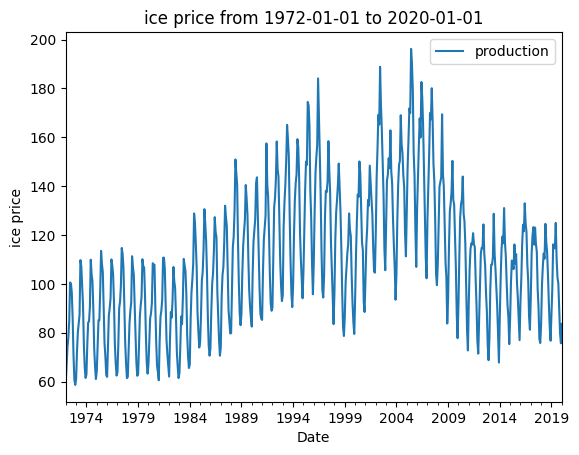

In [ ]:
import matplotlib.pyplot as plt
df_ice_cream.plot()
plt.ylabel("ice price")
plt.title("ice price from 1972-01-01 to 2020-01-01")

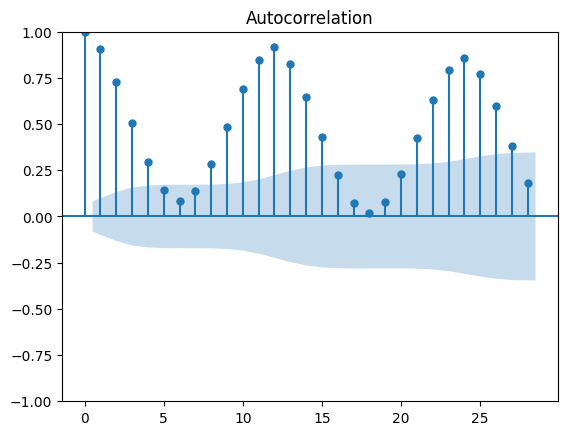

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df_ice_cream)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


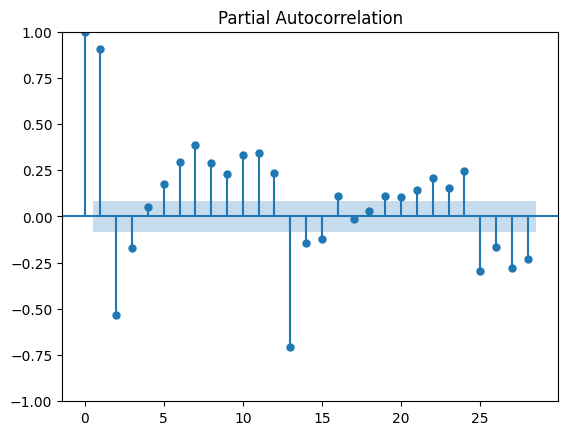

In [ ]:
pacf_plot = plot_pacf(df_ice_cream)

In [ ]:
timestamps = df_ice_cream.index.to_numpy()
production = df_ice_cream['production'].to_numpy()
timestamps[:10], production[:10]

(array(['1972-01-01T00:00:00.000000000', '1972-02-01T00:00:00.000000000',
        '1972-03-01T00:00:00.000000000', '1972-04-01T00:00:00.000000000',
        '1972-05-01T00:00:00.000000000', '1972-06-01T00:00:00.000000000',
        '1972-07-01T00:00:00.000000000', '1972-08-01T00:00:00.000000000',
        '1972-09-01T00:00:00.000000000', '1972-10-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([ 59.9622,  67.0605,  74.235 ,  78.112 ,  84.7636, 100.596 ,
        100.1263,  96.3607,  85.8007,  70.3934]))

In [ ]:
print(df_ice_cream.index)

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Date', length=577, freq=None)


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(production)
print(f"Dicki fuller statistic test = {result[0]}")
print(f"p-value = {result[1]}")

Dicki fuller statistic test = -1.7580087755105436
p-value = 0.40149928994076134


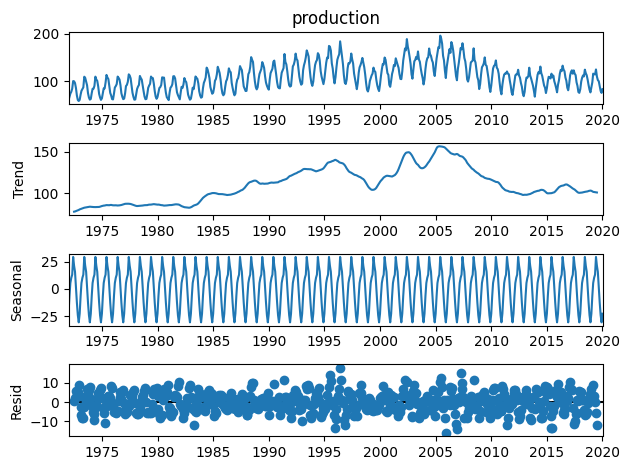

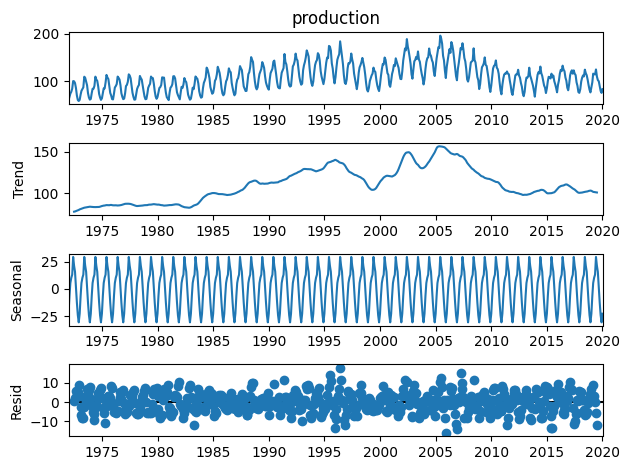

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_ice_cream['production'])
decomposition.plot();

In [ ]:
split_size = int(0.8 * len(production))
X_train, y_train = timestamps[:split_size], production[:split_size]
X_test, y_test = timestamps[split_size:], production[split_size:]
# print(X_train[:10])
# print(y_train[:10])
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

train = df_ice_cream[:split_size]
test = df_ice_cream[split_size:]
print(train.shape, test.shape)

(461, 1) (116, 1)


In [ ]:
import itertools
import statsmodels.api as sm
import time
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf

def mean_square_error(y_true, y_pred):
  sum = np.sum(np.square(y_true-y_pred))
  msqe = sum / len(y_true)
  return msqe

def mean_absolute_percentage_error(y_true, y_pred):
  mape = 1 / len(y_true) * np.sum(np.abs(y_true-y_pred) / y_true) * 100
  return mape

rsme = []
msqe = []
order = []

p = range(8,10)
q = range(5,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
print(len(pdq_combination))
start = time.time()
for pdq in pdq_combination:
  try:
    #model = sm.tsa.arima.ARIMA(train, order=pdq)
    model = sm.tsa.statespace.SARIMAX(train, order=pdq)
    model_fit = model.fit()
    preds = model_fit.forecast(len(test))
    rsme_error = np.sqrt(mean_square_error(test['production'], preds))
    rsme.append(rsme_error)
    msqe_error = mean_absolute_percentage_error(test['production'], preds)
    msqe.append(msqe_error)
    order.append(pdq)
  except:
    continue
end = time.time()
print(f'model combination fit time: {start - end}')
#print(rsme)
#print(order)
df_arima_results_msqe = pd.DataFrame(index=order, data=msqe, columns=['MSQE'])
df_arima_results_rsme = pd.DataFrame(index=order, data=rsme, columns=['RSME'])
#df_arima_results.head(10)

In [ ]:
df_arima_results_msqe.sort_values(by=['MSQE'], ascending=True)

,MSQE
"(9, 1, 6)",12.420145
"(9, 1, 7)",12.537773
"(8, 0, 5)",12.563516
"(8, 1, 7)",12.681171
"(9, 0, 5)",12.976501
"(9, 0, 7)",13.564633
"(9, 1, 5)",14.099663
"(8, 1, 5)",14.171941
"(8, 0, 7)",14.645285
"(8, 1, 6)",15.473705


In [ ]:
df_arima_results_rsme.sort_values(by=['RSME'], ascending=True)

,RSME
"(8, 0, 5)",13.806896
"(9, 0, 5)",14.453578
"(8, 1, 7)",14.644728
"(9, 1, 6)",14.893042
"(9, 1, 7)",15.037478
"(8, 1, 5)",15.216488
"(9, 1, 5)",15.400015
"(9, 0, 7)",15.792857
"(8, 0, 7)",16.701540
"(8, 0, 6)",17.302880


In [ ]:
import statsmodels.api as sm
import time

model = sm.tsa.arima.ARIMA(train, order=(4, 1, 7))
start = time.time()
model_fit = model.fit()
end = time.time()
print(f'model fit time: {start - end}')
model_fit.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


model fit time: -8.12771487236023


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  461
Model:                 ARIMA(4, 1, 7)   Log Likelihood               -1511.834
Date:                Tue, 25 Apr 2023   AIC                           3047.669
Time:                        17:01:00   BIC                           3097.244
Sample:                    01-01-1972   HQIC                          3067.190
                         - 05-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0533      0.034      1.562      0.118      -0.014       0.120
ar.L2          0.9649      0.034     28.218      0.000       0.898       1.032
ar.L3         -0.0514      0.035     -1.482      0.138      -0.119       0.017
ar.L4         -0.9390      0.034    -27.422      0.000      -1.006      -0.872
ma.L1         -0.3795      0.062     -6.107      0.000      -0.501      -0.258
ma.L2         -1.1631      0.069    -16.962      0.000      -1.298      -1.029
ma.L3          0.3173      0.078      4.042      0.000       0.163       0.471
ma.L4          1.1560      0.068     17.061      0.000       1.023       1.289
ma.L5         -0.2801      0.068     -4.108      0.000      -0.414      -0.146
ma.L6         -0.3124      0.053     -5.884      0.000      -0.416      -0.208
ma.L7          0.0608      0.048      1.254      0.210      -0.034       0.156
sigma2        39.6615      2.715     14.611      0.000      34.341      44.982
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                10.63
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2010-06-01 00:00:00 2020-01-01 00:00:00


<Axes: >

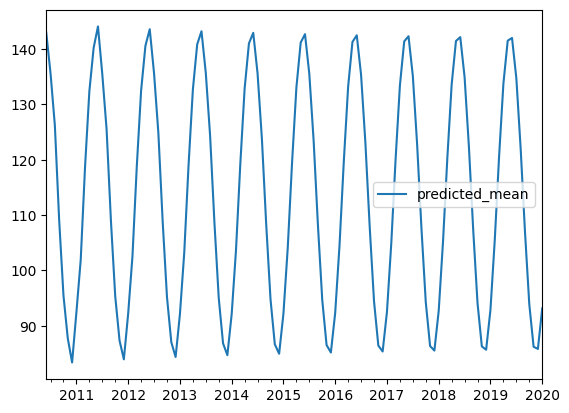

In [ ]:
pred_start_date = test.index[0]
pred_end_date = test.index[-1]
print(pred_start_date, pred_end_date)
#preds = model_fit.predict()
preds = model_fit.forecast(len(test))
#print(preds)
df_preds = pd.DataFrame(preds)
df_preds.plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


model fit time: -6.518033504486084


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


model fit time: -5.601541042327881


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

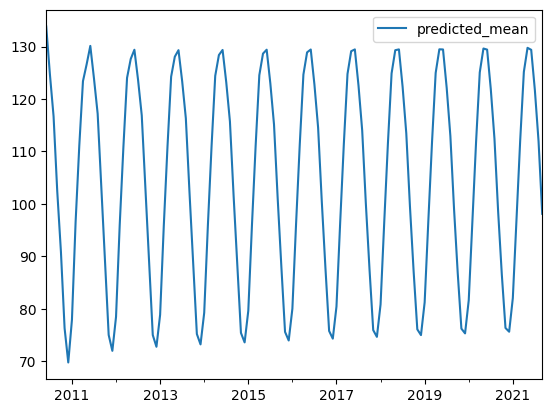

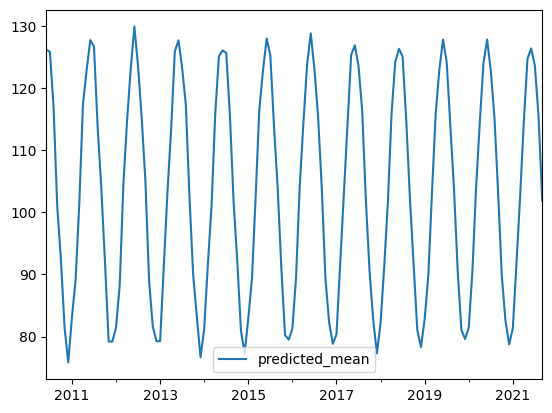

In [ ]:
import statsmodels.api as sm
import time

#model_1 = sm.tsa.arima.ARIMA(train, order=(4, 1, 7))
model_1 = sm.tsa.statespace.SARIMAX(train, order=(9, 1, 6))
start = time.time()
model_1_fit = model_1.fit()
end = time.time()
print(f'model fit time: {start - end}')
model_1_fit.summary()

preds_1 = model_1_fit.forecast(len(test) + 20) - 12
df_preds_1 = pd.DataFrame(preds_1)
df_preds_1.plot()

#model_2 = sm.tsa.arima.ARIMA(train, order=(3, 0, 2))
model_2 = sm.tsa.statespace.SARIMAX(train, order=(5, 1, 4))
start = time.time()
model_2_fit = model_2.fit()
end = time.time()
print(f'model fit time: {start - end}')
model_2_fit.summary()

preds_2 = model_2_fit.forecast(len(test) + 20) - 10
df_preds_2 = pd.DataFrame(preds_2)
df_preds_2.plot();

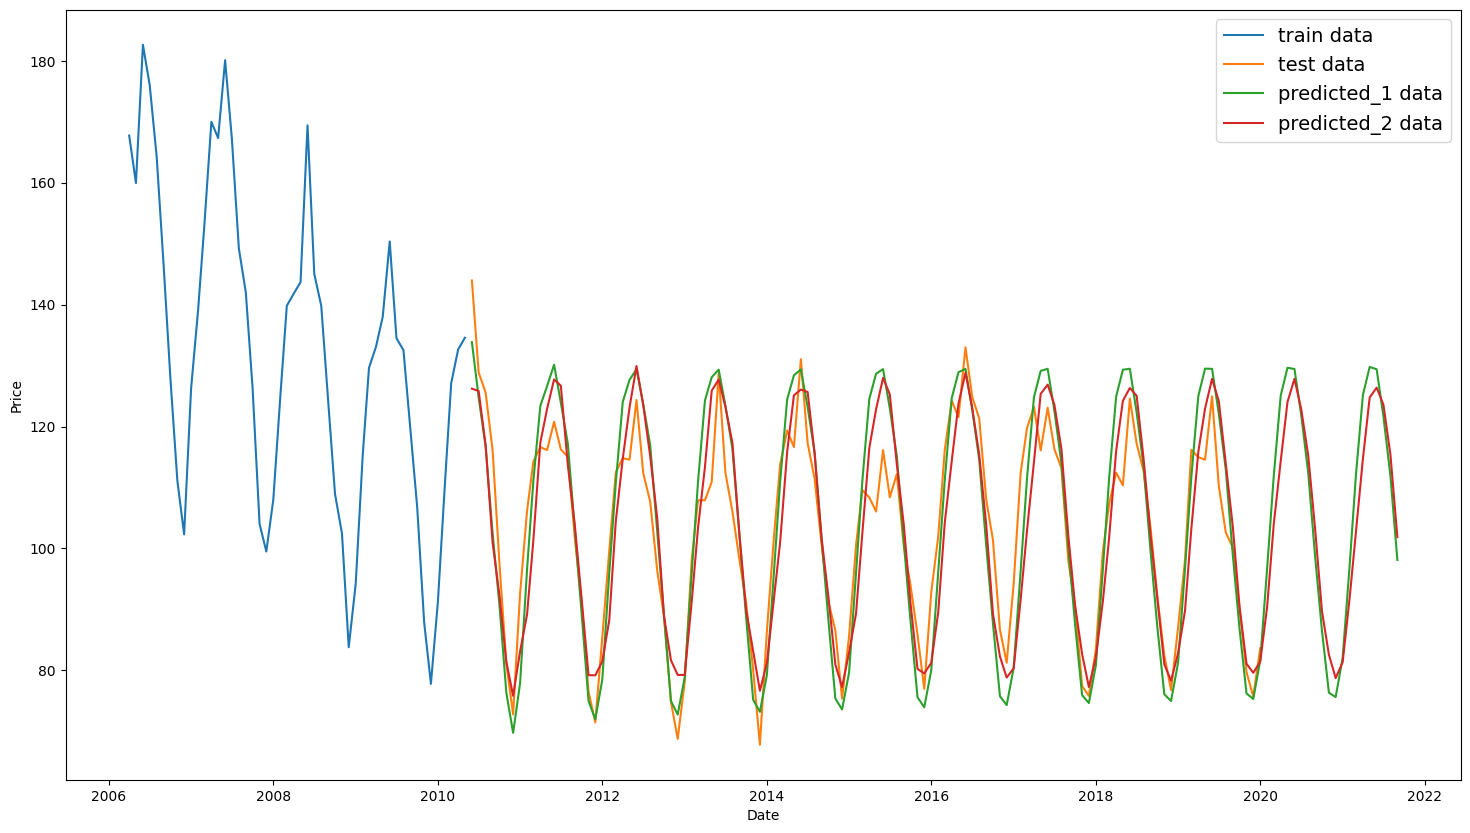

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
df_last_50 = train.tail(50)
plt.plot(df_last_50, label="train data")
plt.plot(test, label="test data")
plt.plot(df_preds_1, label="predicted_1 data")
plt.plot(df_preds_2, label="predicted_2 data")
#plt.scatter(train.index, train['production'], s=5, label="train data")
#plt.scatter(test.index, test['production'], s=5, label="test data")
#plt.scatter(df_preds_1.index, df_preds_1['predicted_mean'], s=5, label="predicted_1 data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show()

### calculate moving average
https://www.educba.com/moving-average-formula/

In [ ]:
def calc_simple_moving_average(df_timeseries, column, window=7):
  df_timeseries['moving_average'] = 0.0
  counterindex = 0
  for index, row in df_timeseries.iterrows():
    if counterindex >= window:
      startindex = counterindex - window
      sum = 0.0
      while (startindex < counterindex):
        sum = sum + float(df_timeseries.iloc[startindex][column])
        startindex += 1
      mean = float(sum) / float(window)
      row['moving_average'] = float(mean)
    counterindex = counterindex + 1
  return df_timeseries

def calc_weighted_moving_average(df_timeseries, column, weights=[0.05, 0.15, 0.30, 0.50]):
  df_timeseries['weighted_moving_average'] = 0.0
  counterindex = 0
  window = len(weights)
  for index, row in df_timeseries.iterrows():
    if counterindex >= window:
      startindex = counterindex - window
      sum = 0.0
      weight_index = 0
      while (startindex < counterindex):
        weight = weights[weight_index]
        sumpart = (float(df_timeseries[column][startindex]) * weight)
        sum = sum + sumpart
        startindex += 1
        weight_index += 1
      row['weighted_moving_average'] = float(sum)
    counterindex = counterindex + 1
  return df_timeseries

#Multiplying Factor = 2 / (window + 1) = 0.4
#Exponential Moving Average = (C – P) * 2 / (n + 1) + P
def calc_exponential_moving_average(df_timeseries, column, window = 4):
  multiply_factor = 2.0 / (window + 1)
  df_timeseries['exponential_moving_average'] = 0.0
  counterindex = 0
  for index, row in df_timeseries.iterrows():
    if counterindex >= window:
      startindex = counterindex - window
      sum = 0.0
      while (startindex < counterindex):
        sum = sum + float(df_timeseries.iloc[startindex][column])
        startindex += 1
      mean = float(sum) / float(window)
      row['exponential_moving_average'] = (float(mean) - float(row[column])) * multiply_factor + float(row[column])
    counterindex = counterindex + 1
  return df_timeseries

In [ ]:
import pandas as pd
df_ice_cream = pd.read_csv('ice_cream.csv', index_col='DATE', parse_dates=True)
df_ice_cream['IPN31152N'].rename
df_ice_cream.rename(columns = {'IPN31152N':'production'}, inplace = True)
#df_ice_cream = df_ice_cream.set_index('DATE')
df_ice_cream = calc_simple_moving_average(df_ice_cream, 'production', window=50)
df_ice_cream = calc_weighted_moving_average(df_ice_cream, 'production', weights=[0.01, 0.05, 0.09, 0.20, 0.30, 0.40])
df_ice_cream = calc_exponential_moving_average(df_ice_cream, 'production', window=50)
#df_ice_cream.head(20)

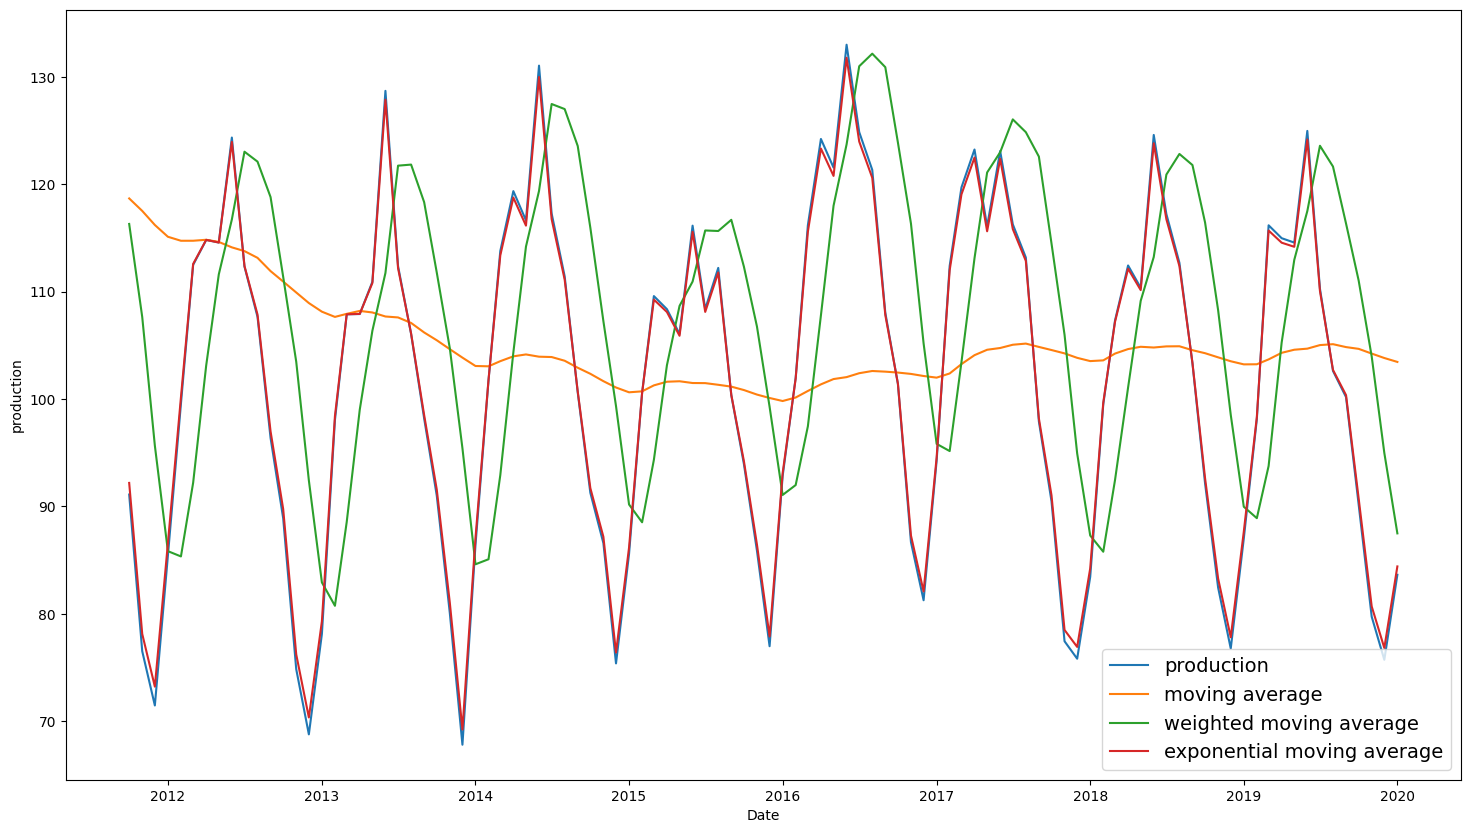

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
df_ice_cream_tail = df_ice_cream.tail(100)
plt.plot(df_ice_cream_tail['production'], label="production")
plt.plot(df_ice_cream_tail['moving_average'], label="moving average")
plt.plot(df_ice_cream_tail['weighted_moving_average'], label="weighted moving average")
plt.plot(df_ice_cream_tail['exponential_moving_average'], label="exponential moving average")
plt.xlabel("Date")
plt.ylabel("production")
plt.legend(fontsize=14)
plt.show()